<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Retail_Crypto_Universe_Return_by_Ticker_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

16:38:27 Starting...
16:38:27 Installing yfinance into Google notebook...
16:38:40 Installing arch into Google notebook...
16:38:54 Initialized.


In [2]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=list(map(lambda x:x.replace("-USD",""),data.columns.droplevel(1)))
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
display(data)

Return (%),AAVE,ADA,ARB,AVAX,BCH,BONK,BTC,COMP,DOGE,ETC,...,PNUT,POPCAT,SHIB,SOL,TRUMP,UNI,WIF,XLM,XRP,XTZ
UTC Date,,,,,,,,,,,,,,,,,,,,,
2024-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-08,NaN,NaN,NaN,NaN,NaN,NaN,1.448534,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09,NaN,NaN,NaN,NaN,NaN,NaN,2.348370,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.402624,NaN,0.477437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,2.013289,NaN,-0.655153,NaN,-1.226744,-1.542857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-18,4.467709,2.314781,5.042404,3.867112,3.498362,11.756720,3.149721,5.187419,8.580249,3.171661,...,18.223749,11.850659,5.813953,4.351120,4.621688,7.068841,14.355821,2.078920,3.157799,3.876386
2025-05-19,6.443445,-2.295334,-0.762880,-3.389058,-3.282590,-4.154519,-0.764352,-4.829850,-3.724915,-0.944054,...,-2.975321,-9.171970,-2.830503,-3.682969,-2.749390,-3.154751,-6.883488,-2.010943,-1.993209,-3.281587
2025-05-20,5.026192,0.477961,0.433240,1.575605,0.326137,1.571610,1.162133,-0.429612,0.733036,-0.567034,...,-5.438056,3.969475,0.137080,1.077644,11.987591,1.558737,-1.797992,0.319066,-0.983279,1.492341


18:47:16 Wrote figure to 'Cumulative Return for Retail Cryptocurrency Sample.png'.


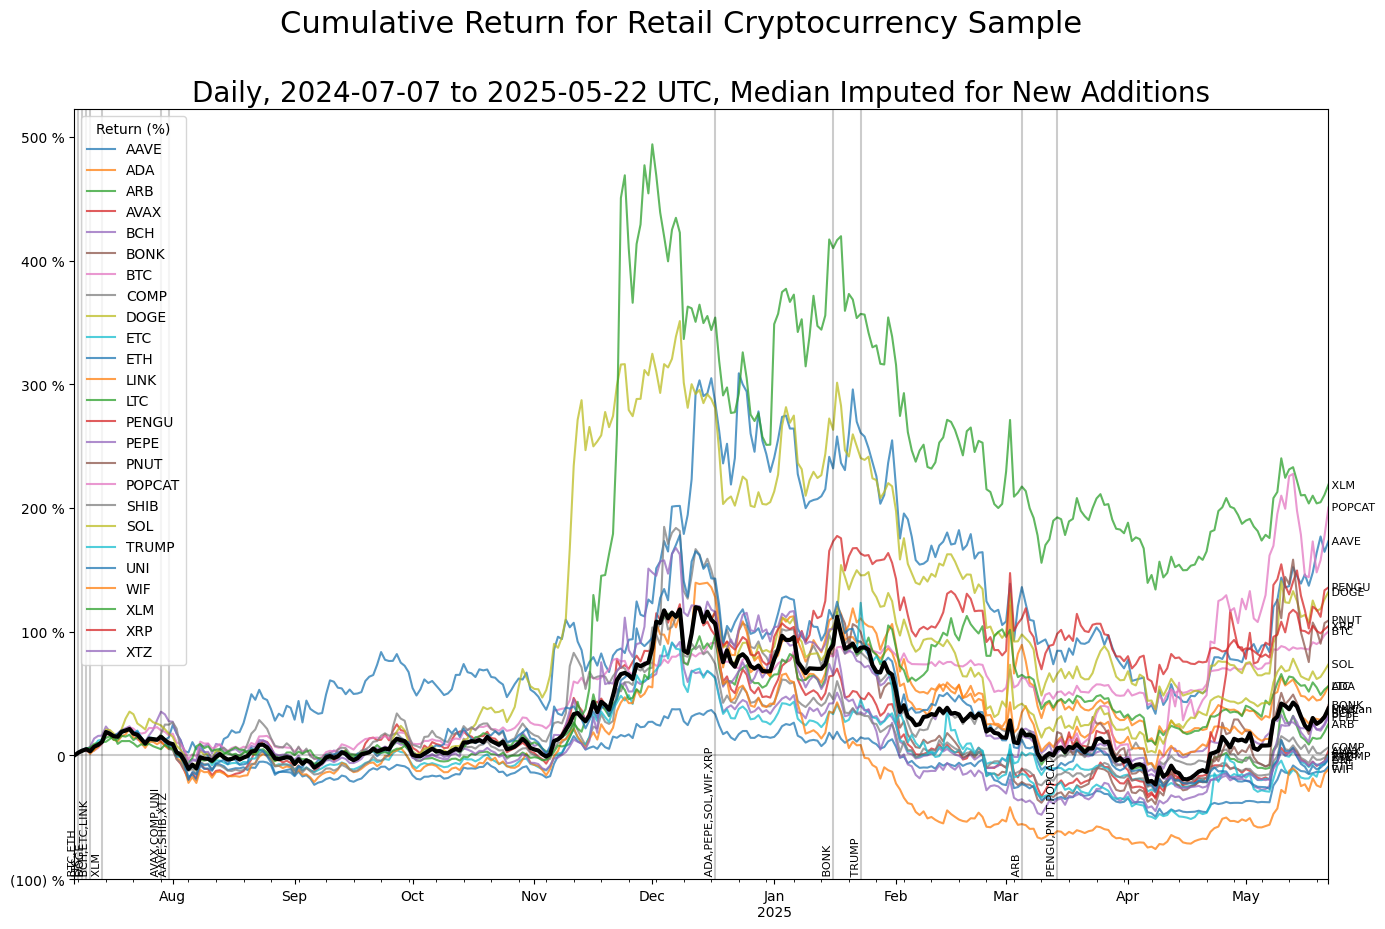

In [72]:
factor=(one+data/hundred)

for k,v in sorted(zip((s:=factor.apply(lambda x:x.first_valid_index()-1)).values,s.index),key=lambda x:x[0]):
    factor.loc[k,v]=m if not np.isnan(m:=factor.cumprod().loc[k].median()) else one

factor=factor.cumprod()*hundred-hundred
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
factor.plot(ax=plot,alpha=0.75)
factor['Median']=factor.median(axis=1)
factor['Median'].plot(ax=plot,color='black',linewidth=3)

plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Cumulative Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC, Median Imputed for New Additions" % (factor.index[0],factor.index[-1]),fontsize=20)

for c in factor:
    plot.text(x:=factor.index[-1],y:=factor.loc[x,c]," "+c,fontsize=8,ha='left',va='center')

figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

In [69]:
for k,v in zip(s:=pd.DataFrame([(t,data[t].first_valid_index()) for t in data if data[t].first_valid_index()>data.index[0]])\
        .rename(columns={0:"Ticker",1:"Listed"}).set_index("Ticker").groupby("Listed").apply(lambda x:",".join(x.T.columns),include_groups=False),s.index):
    print(v,k)

2024-07-08 BTC,ETH
2024-07-09 LTC
2024-07-10 DOGE
2024-07-11 BCH,ETC,LINK
2024-07-14 XLM
2024-07-29 AVAX,COMP,UNI
2024-07-31 AAVE,SHIB,XTZ
2024-12-17 ADA,PEPE,SOL,WIF,XRP
2025-01-16 BONK
2025-01-23 TRUMP
2025-03-05 ARB
2025-03-14 PENGU,PNUT,POPCAT


17:19:02 Rank Correlation for 'Useful' Coins: SignificanceResult(statistic=np.float64(-0.6), pvalue=np.float64(0.014007122329599993))


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin
Return (%),,,,,,,,,,
AAVE,0.478249,0.786595,5.323184,70,0.636242,1.236315,0.216342,,1,0.0
ADA,0.138190,0.277297,4.174369,70,0.498933,0.555781,0.578360,,2,0.0
ARB,0.502190,0.486914,5.743698,70,0.686503,0.709267,0.478159,,3,0.0
AVAX,0.237914,0.559003,4.881572,70,0.583460,0.958084,0.338020,,4,0.0
BCH,0.176515,0.491095,4.052586,70,0.484377,1.013871,0.310644,,5,0.0
BTC,0.234828,0.483370,2.432851,70,0.290781,1.662316,0.096449,,7,0.0
COMP,-0.107097,0.247052,4.110563,70,0.491306,0.502847,0.615072,,8,0.0
ETC,-0.118930,0.200191,3.636903,70,0.434693,0.460535,0.645132,,10,0.0
ETH,0.015556,0.610785,4.674499,70,0.558710,1.093207,0.274303,,11,0.0


17:19:02
OLS Regression for 'Useful' Coins
                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     7.453
Date:                Thu, 22 May 2025   Prob (F-statistic):             0.0163
Time:                        17:19:02   Log-Likelihood:                 6.5304
No. Observations:                  16   AIC:                            -9.061
Df Residuals:                      14   BIC:                            -7.516
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin,Linear Model
Return (%),,,,,,,,,,,
AAVE,0.478249,0.786595,5.323184,70,0.636242,1.236315,0.216342,,1,0.0,0.577159
ADA,0.138190,0.277297,4.174369,70,0.498933,0.555781,0.578360,,2,0.0,0.551695
ARB,0.502190,0.486914,5.743698,70,0.686503,0.709267,0.478159,,3,0.0,0.526230
AVAX,0.237914,0.559003,4.881572,70,0.583460,0.958084,0.338020,,4,0.0,0.500766
BCH,0.176515,0.491095,4.052586,70,0.484377,1.013871,0.310644,,5,0.0,0.475302
BONK,0.210342,1.376396,7.952709,70,0.950531,1.448029,0.147609,,6,1.0,NaN
BTC,0.234828,0.483370,2.432851,70,0.290781,1.662316,0.096449,,7,0.0,0.449837
COMP,-0.107097,0.247052,4.110563,70,0.491306,0.502847,0.615072,,8,0.0,0.424373
DOGE,0.066216,0.668492,5.235884,70,0.625808,1.068207,0.285427,,9,1.0,NaN


17:19:03 Wrote figure to 'Mean Return for Retail Cryptocurrency Sample.png'.


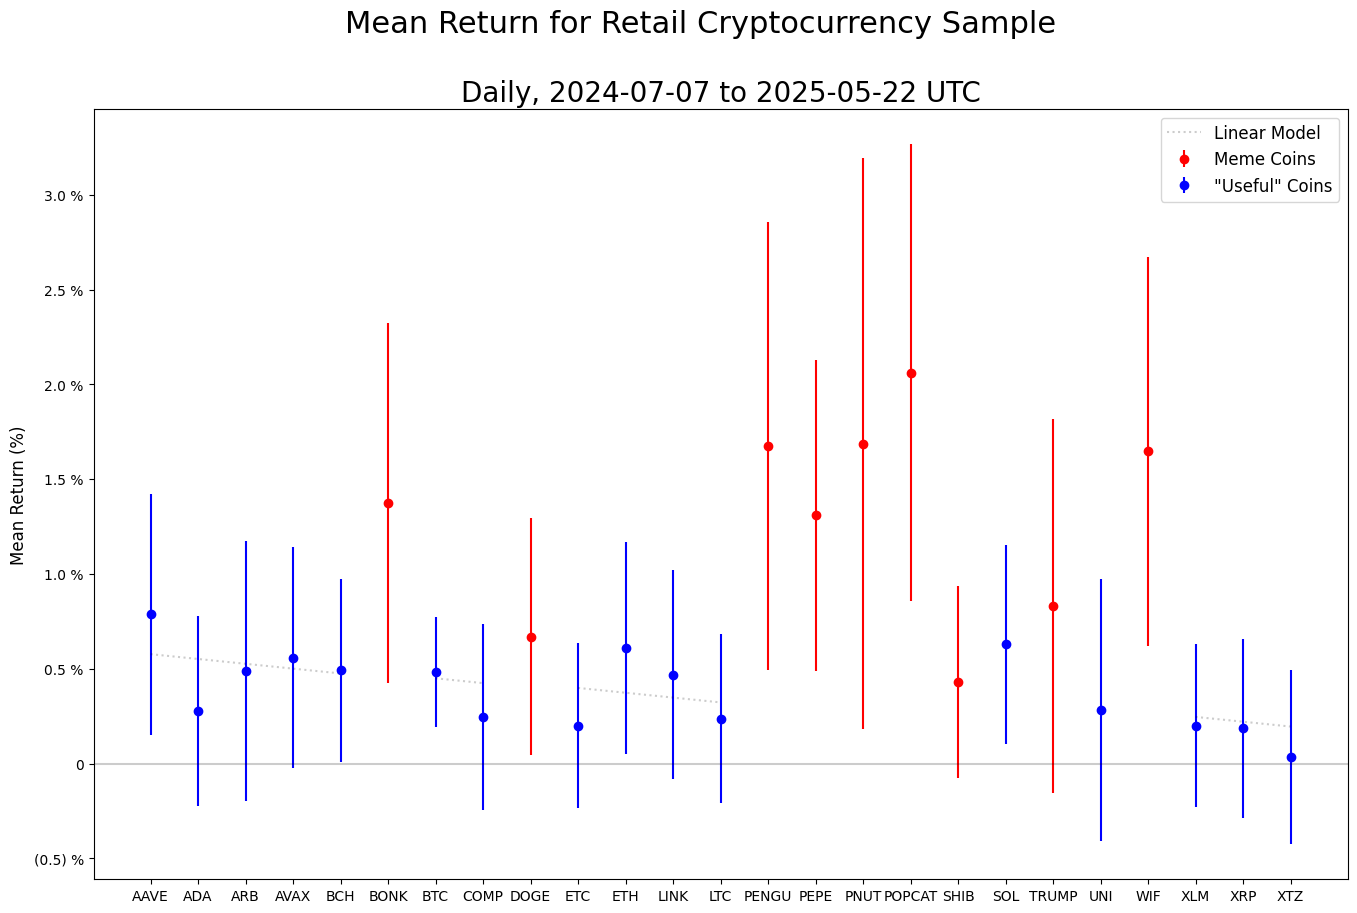

In [17]:
Tfrom scipy.stats import spearmanr,norm
from statsmodels.api import OLS
from statsmodels.tools import add_constant

report=pd.DataFrame({
    "Median":(design:=data.dropna(axis=0).sort_index()).median(), # sort index not needed, but let's do it anyway
    "Mean":(m:=design.mean()),
    "Std.Dev.":design.std(),
    "Sample":design.count(),
    "Std.Err.":(e:=design.std()/np.sqrt(design.count())),
    "t Statistic":(z:=m/e),
    "p Value":(p:=z.apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))),
    "Significance":p.apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else ""),
    "Symbol Rank":list(range(1,m.index.shape[0]+1)),
    "Meme Coin":[one if t in "BONK,DOGE,PENGU,PEPE,PNUT,POPCAT,SHIB,TRUMP,WIF" else zero for t in m.index]
})

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=report.index,y:=report["Mean"],alpha=0,label=None)
plot.errorbar(x:=report[report["Meme Coin"]==one].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Red",label='Meme Coins')
plot.errorbar(x:=report[report["Meme Coin"]==zero].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Blue",label='"Useful" Coins')
nprint("Rank Correlation for 'Useful' Coins:",spearmanr(x,y))

design=report.loc[u:=x];display(design)
design["Symbol Rank"]=list(range(1,design.index.shape[0]+1))
fit=OLS(y:=design["Mean"],add_constant(x:=design["Symbol Rank"])).fit()
nprint("OLS Regression for 'Useful' Coins",fit.summary(),sep="\n")
report.loc[design.index,"Linear Model"]=fit.predict()
display(report)

plot.plot(x:=report.index,y:=report["Linear Model"],':',color='black',alpha=0.2,label="Linear Model")
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Mean Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (data[u].index[0],data[u].index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.set_ylabel("Mean Return (%)",fontsize=12)
plot.legend(fontsize=12)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

In [15]:
from warnings import catch_warnings,simplefilter

design=data[report[report["Meme Coin"]==zero].index].dropna()
results=pd.DataFrame(index=design.columns)
nprint("Fitting AR(1)-AGARCH(1,1) Model with GED Innovations for %s to %s UTC..." % (design.index[0],design.index[-1]))

for ticker in tqdm(design.columns):
    model=ARX(design[ticker],lags=[1])
    model.volatility = GARCH2(1,0,1)
    model.distribution = GeneralizedError2()

    with catch_warnings():
        simplefilter("ignore")
        ged_model=model.fit(update_freq=0,disp='Off',options={'maxiter':1000})

        if ged_model.convergence_flag==0:
            for field in "Estimate","Std.Err.":
                results.loc[ticker,"Drift,%s" % field]=(g:=ged_model.params if field=="Estimate" else ged_model.std_err)["Const"]
                results.loc[ticker,"Return,%s" % field]=g[ticker+"[1]"]
                results.loc[ticker,"C,%s" % field]=g["omega"]
                results.loc[ticker,"A,%s" % field]=g["alpha[1]"]
                results.loc[ticker,"B,%s" % field]=g["beta[1]"]
                results.loc[ticker,"nu,%s" % field]=g["nu"]

            results.loc[ticker,"variance,Estimate"]=results.loc[ticker,"C,Estimate"]/(one-results.loc[ticker,"B,Estimate"]-results.loc[ticker,"B,Estimate"])

results.columns=pd.MultiIndex.from_tuples(list(map(lambda x:tuple(x.split(",")),results.columns)))
spearman=pd.DataFrame(index=(lambda x:dict.fromkeys(x).keys())(results.columns.get_level_values(0)))
results.sort_index(axis=1,inplace=True)
display(results)

nprint("Analysis of correlation with ticker ranks...")

for estimator in spearman.index:
    spearman.loc[estimator,"Rank Correlation"]=(R:=spearmanr(x:=results.index,y:=results.xs("Estimate",axis=1,level=1)[estimator])).statistic
    spearman.loc[estimator,"Sample"]=(n:=len(x))
    spearman.loc[estimator,"t Statistic"]=R.statistic*((n-two)/(one-R.statistic**two))**half
    spearman.loc[estimator,"p Value"]=R.pvalue

spearman["Significance"]=spearman["p Value"].apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else "")
display(spearman.sort_values("Rank Correlation",ascending=False))

17:15:05 Fitting AR(1)-AGARCH(1,1) Model with GED Innovations for 2025-03-05 to 2025-05-22 UTC...


  0%|          | 0/16 [00:00<?, ?it/s]

A                       B                        C  \
            Estimate      Std.Err.  Estimate      Std.Err.   Estimate   
Return (%)                                                              
AAVE        0.003327  6.489215e-02  0.492010  1.486409e+00  13.560179   
ADA         0.109906  1.335628e-01  0.632936  1.669167e-01   4.902932   
ARB         0.118291  1.005101e-01  0.629024  8.978628e-02   8.099997   
AVAX       -0.156736  2.152162e-11  1.122334  1.426291e-10   1.507129   
BCH         0.090790  1.191837e-01  0.604825  8.780763e-02   5.377017   
BTC        -0.125369  6.974776e-08  1.115893  6.208352e-07   0.214880   
COMP        0.047045  8.754756e-02  0.747319  1.016160e-01   3.555778   
ETC         0.090470  6.292160e-02  0.335008  3.231400e-01   8.288253   
ETH         0.379251  3.466696e-01  0.278554  9.625050e-01  10.619726   
LINK       -0.140864  3.219814e-07  1.121635  1.493366e-06   0.882634   
LTC         0.046297  1.060465e-01  0.612808  1.335343e-01   4.782792   
SOL         0.046222  1.184643e-01  0.812108  1.684418e-01   2.694340   
UNI         0.209437  2.922154e-01  0.401833  1.017480e+00  15.592457   
XLM         0.094119  1.054437e-01  0.550195  9.357877e-02   4.817227   
XRP         0.187416  1.857134e-01  0.603533  1.260259e-01   4.057234   
XTZ         0.071514  1.058456e-01  0.569467  2.726821e-01   5.828949   

                             Drift              Return                  nu  \
                Std.Err.  Estimate  Std.Err.  Estimate  Std.Err.  Estimate   
Return (%)                                                                   
AAVE        4.403008e+01 -0.024179  0.538551 -0.154144  0.137338  1.249300   
ADA         3.193188e+00 -0.281292  0.555521 -0.194581  0.195841  1.079747   
ARB         4.355425e+00  0.402876  0.000171  0.035061  0.000034  0.956180   
AVAX        8.816366e-11 -0.247326  0.000376 -0.025538  0.000045  2.631305   
BCH         1.898493e+00  0.114821  0.002015 -0.070918  0.000537  1.172329   
BTC         1.783108e-07  0.305174  0.001030 -0.127711  0.001312  1.682700   
COMP        2.010353e+00 -0.147444  0.519845 -0.040168  0.176353  1.311918   
ETC         5.218505e+00 -0.259727  0.000306 -0.112322  0.000562  1.056286   
ETH         2.006958e+01  0.124861  0.000128 -0.185810  0.000270  0.638899   
LINK        9.841940e-08 -0.039681  0.026127 -0.055604  0.002883  1.875195   
LTC         2.427074e+00  0.070197  0.358235 -0.169293  0.059191  1.091555   
SOL         3.193441e+00  0.115414  0.968490 -0.055781  0.280354  1.198659   
UNI         3.273068e+01 -0.616569  0.000954 -0.164758  0.000221  0.678496   
XLM         2.342966e+00 -0.015976  0.291932 -0.087344  0.092637  1.403410   
XRP         2.419465e+00 -0.121609  0.000035  0.068549  0.000039  0.863634   
XTZ         5.280720e+00  0.436269  0.000361  0.037096  0.000058  1.004003   

                        variance  
            Std.Err.    Estimate  
Return (%)                        
AAVE        0.276197  848.612329  
ADA         0.460898  -18.440977  
ARB         0.209291  -31.389398  
AVAX        0.000022   -1.210868  
BCH         0.291543  -25.647534  
BTC         0.004880   -0.174446  
COMP        0.312754   -7.188640  
ETC         0.217400   25.117180  
ETH         0.148052   23.978170  
LINK        0.002800   -0.709930  
LTC         0.245836  -21.198795  
SOL         0.411571   -4.316359  
UNI         0.192051   79.417795  
XLM         0.248632  -47.984920  
XRP         0.195773  -19.593919  
XTZ         0.232873  -41.954717

17:15:07 Analysis of correlation with ticker ranks...


,Rank Correlation,Sample,t Statistic,p Value,Significance
Return,0.267647,16.0,1.039363,0.316254,
A,0.238235,16.0,0.917821,0.374254,
Drift,0.120588,16.0,0.454517,0.656425,
C,-0.067647,16.0,-0.253693,0.803420,
B,-0.258824,16.0,-1.002593,0.333072,
nu,-0.276471,16.0,-1.076414,0.299942,
variance,-0.282353,16.0,-1.101278,0.289350,
